In [1]:
from PME import PME1D, PME2D
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

# One dimension

## Sample solution

In [2]:
P = PME1D(beta=0.01, nx=32, ny=32, order=2, nonLinearSolver='newton')
print(P)
P.solve()
P.draw(P.rhoh)

Porous Medium Equation
  C: 1
  alpha: 2
  beta: 0.01
  Time domain: [0, 1]
  Spatial domain: [0, 1]
  Discretization size: 32 x 32
  Order: 2
  Degrees of freedom (primal space):  4096
  Degrees of freedom (dual space):  4225
  Non-linear solver: newton
  PDHG iterations: 1000
Iteration: 1000 PDHG error: 9.47310780e-08 spacetime error: 4.78986744e-06 terminal error 6.26346609e-06



WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

In [3]:
P.saveVTK("PME1D_alpha_2_beta_0p01_order_2_32x32")

## Convergence study

In [4]:
nx, ny = 8, 8
beta = 0.01

labels = [r'$8\times 8$', r'$16\times 16$', r'$32\times 32$', r'$64\times64$']
colors = ['r','g','b','m']

### $\alpha = 1.5$

In [5]:
alpha = 1.5

$p=1$

Porous Medium Equation
  C: 1
  alpha: 1.5
  beta: 0.01
  Time domain: [0, 1]
  Spatial domain: [0, 1]
  Discretization size: 8 x 8
  Order: 1
  Degrees of freedom (primal space):  64
  Degrees of freedom (dual space):  81
  Non-linear solver: newton
  PDHG iterations: 1000
Iteration: 1000 PDHG error: 1.03326446e-08 spacetime error: 2.52483032e-03 terminal error 3.80457877e-03

Iteration: 1000 PDHG error: 1.16037373e-08 spacetime error: 6.04175958e-04 terminal error 9.14682555e-04

Order (ST) =  2.0631457519870677
Order (Terminal) =  2.056393692924779


Iteration: 1000 PDHG error: 1.19404536e-08 spacetime error: 1.49635968e-04 terminal error 2.26804688e-04

Order (ST) =  2.013511781959571
Order (Terminal) =  2.011820675998272


Iteration: 1000 PDHG error: 1.20260263e-08 spacetime error: 3.75256202e-05 terminal error 5.69199578e-05

Order (ST) =  1.9955091712779374
Order (Terminal) =  1.9944439626514323




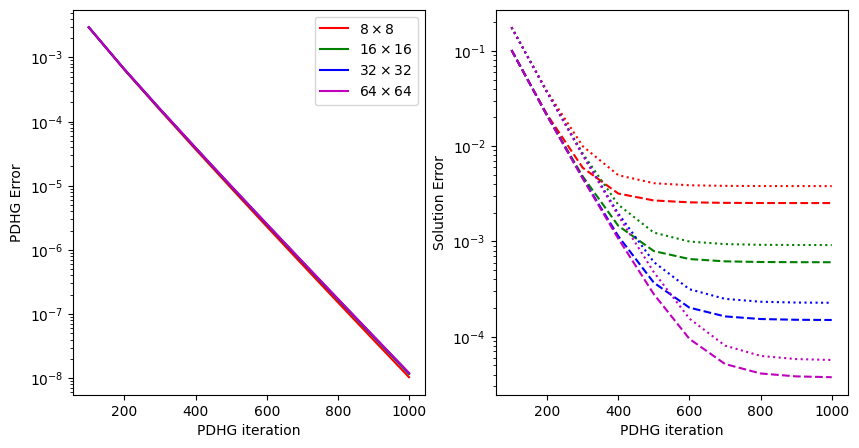

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1000
order = 1
for i in range(4):
    P1 = PME1D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i,
            nonLinearSolver='newton'
        )
    if i == 0: print(P1)
    P1.solve()
    P1.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P1.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P1.terminalErr[-1]))
        print("\n")
    err0 = P1.stErr[-1]
    err1 = P1.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=2$

Porous Medium Equation
  C: 1
  alpha: 1.5
  beta: 0.01
  Time domain: [0, 1]
  Spatial domain: [0, 1]
  Discretization size: 8 x 8
  Order: 2
  Degrees of freedom (primal space):  256
  Degrees of freedom (dual space):  289
  Non-linear solver: newton
  PDHG iterations: 1500
Iteration: 1500 PDHG error: 1.48769663e-10 spacetime error: 2.46270801e-04 terminal error 2.23591735e-04

Iteration: 1500 PDHG error: 4.83011475e-09 spacetime error: 3.22244203e-05 terminal error 2.68426333e-05

Order (ST) =  2.9340192764891198
Order (Terminal) =  3.058268746447134


Iteration: 1500 PDHG error: 7.83767495e-11 spacetime error: 4.07174742e-06 terminal error 3.86823912e-06

Order (ST) =  2.9844344266789995
Order (Terminal) =  2.794777322783415


Iteration: 1500 PDHG error: 1.64714908e-11 spacetime error: 5.10335395e-07 terminal error 4.85825462e-07

Order (ST) =  2.9961304616496136
Order (Terminal) =  2.993166973304417




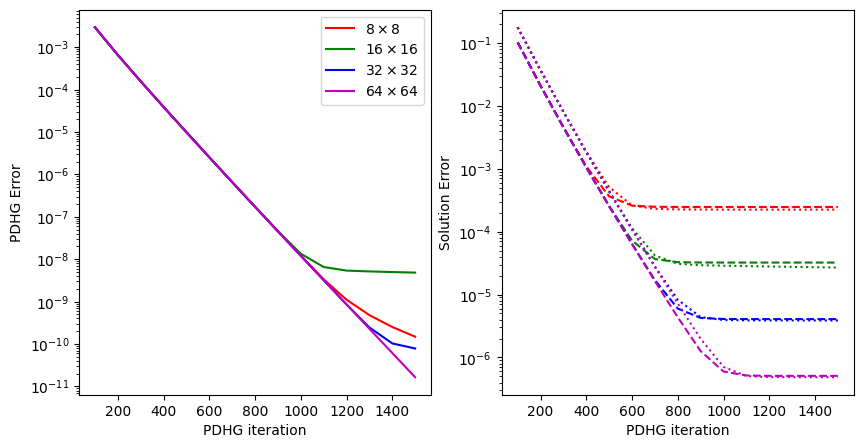

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1500
order = 2
for i in range(4):
    P2 = PME1D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i,
            nonLinearSolver='newton'
        )
    if i == 0: print(P2)
    P2.solve()
    P2.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P2.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P2.terminalErr[-1]))
        print("\n")
    err0 = P2.stErr[-1]
    err1 = P2.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Porous Medium Equation
  C: 1
  alpha: 1.5
  beta: 0.01
  Time domain: [0, 1]
  Spatial domain: [0, 1]
  Discretization size: 8 x 8
  Order: 3
  Degrees of freedom (primal space):  576
  Degrees of freedom (dual space):  625
  Non-linear solver: newton
  PDHG iterations: 1800
Iteration: 1800 PDHG error: 4.30688818e-12 spacetime error: 1.16988724e-05 terminal error 1.12417669e-05

Iteration: 1800 PDHG error: 4.52970994e-13 spacetime error: 7.42051495e-07 terminal error 7.08043200e-07

Order (ST) =  3.978706363882994
Order (Terminal) =  3.9888876079447444


Iteration: 1800 PDHG error: 3.29070104e-13 spacetime error: 4.65531756e-08 terminal error 4.43330572e-08

Order (ST) =  3.994567818576019
Order (Terminal) =  3.9973826267031773


Iteration: 1800 PDHG error: 3.26960681e-13 spacetime error: 2.91237949e-09 terminal error 2.77407648e-09

Order (ST) =  3.9986093243215963
Order (Terminal) =  3.9983033836078428




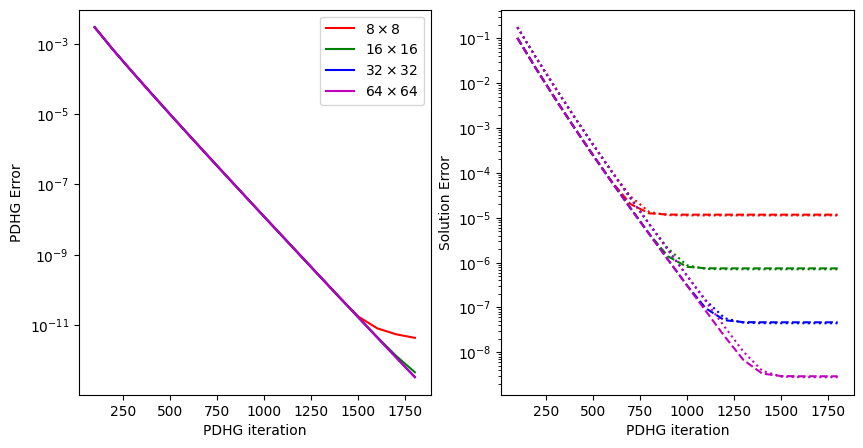

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1800
order = 3
for i in range(4):
    P3 = PME1D(
        order   = order,
        maxIter = nIter + 1, 
        alpha   = alpha, 
        beta    = beta, 
        nx      = nx * 2 ** i, 
        ny      = ny * 2 ** i,
        nonLinearSolver='newton'
    )
    if i == 0: print(P3)
    P3.solve()
    P3.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P3.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P3.terminalErr[-1]))
        print("\n")
    err0 = P3.stErr[-1]
    err1 = P3.terminalErr[-1]
    
axs[0].legend()
plt.show()


### $\alpha = 2$

In [9]:
alpha = 2

$p=1$

Porous Medium Equation
  C: 1
  alpha: 2
  beta: 0.01
  Time domain: [0, 1]
  Spatial domain: [0, 1]
  Discretization size: 8 x 8
  Order: 1
  Degrees of freedom (primal space):  64
  Degrees of freedom (dual space):  81
  Non-linear solver: newton
  PDHG iterations: 1000
Iteration: 1000 PDHG error: 8.01901424e-08 spacetime error: 3.59926209e-03 terminal error 4.96724659e-03

Iteration: 1000 PDHG error: 9.08192779e-08 spacetime error: 8.70166710e-04 terminal error 1.20942167e-03

Order (ST) =  2.048337431175968
Order (Terminal) =  2.0381290333379734


Iteration: 1000 PDHG error: 9.37740982e-08 spacetime error: 2.16667242e-04 terminal error 3.02188027e-04

Order (ST) =  2.005810776140975
Order (Terminal) =  2.000798929897171


Iteration: 1000 PDHG error: 9.45329994e-08 spacetime error: 5.50656366e-05 terminal error 7.74581523e-05

Order (ST) =  1.9762568514698189
Order (Terminal) =  1.9639575058474292




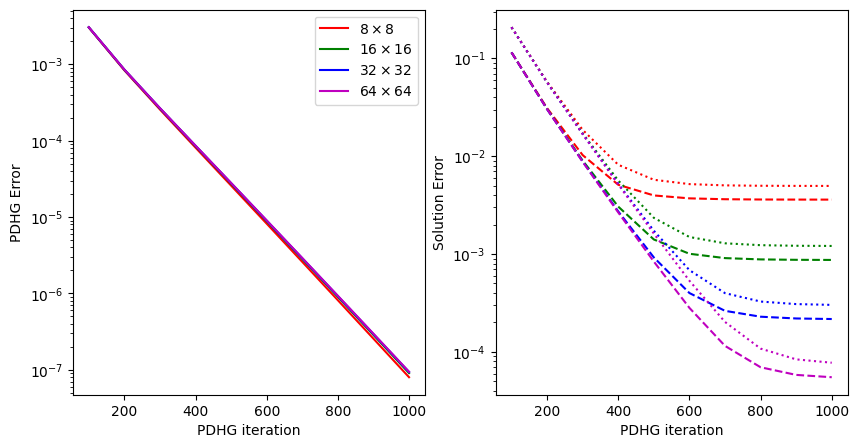

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1000
order = 1
for i in range(4):
    PP1 = PME1D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i,
            nonLinearSolver='newton'
        )
    if i == 0: print(PP1)
    PP1.solve()
    PP1.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP1.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP1.terminalErr[-1]))
        print("\n")
    err0 = PP1.stErr[-1]
    err1 = PP1.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=2$

Porous Medium Equation
  C: 1
  alpha: 2
  beta: 0.01
  Time domain: [0, 1]
  Spatial domain: [0, 1]
  Discretization size: 8 x 8
  Order: 2
  Degrees of freedom (primal space):  256
  Degrees of freedom (dual space):  289
  Non-linear solver: newton
  PDHG iterations: 1500
Iteration: 1500 PDHG error: 8.51499404e-09 spacetime error: 2.48128460e-04 terminal error 1.99238879e-04

Iteration: 1500 PDHG error: 4.60837524e-09 spacetime error: 3.22719355e-05 terminal error 2.73425764e-05

Order (ST) =  2.9427352057059464
Order (Terminal) =  2.8652781039233837


Iteration: 1500 PDHG error: 3.05194425e-10 spacetime error: 4.07329552e-06 terminal error 3.86944861e-06

Order (ST) =  2.986011715737917
Order (Terminal) =  2.820949288121021


Iteration: 1500 PDHG error: 3.00015679e-10 spacetime error: 5.10500498e-07 terminal error 4.85869920e-07

Order (ST) =  2.9962122113089107
Order (Terminal) =  2.9934859743178444




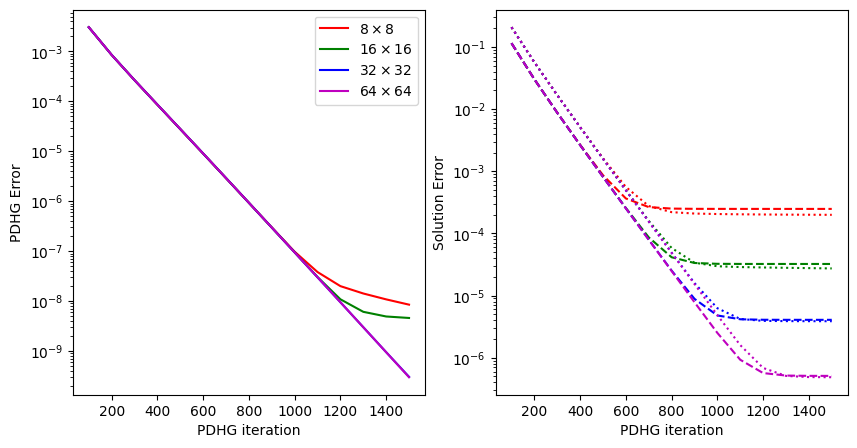

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1500
order = 2
for i in range(4):
    PP2 = PME1D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i,
            nonLinearSolver='newton'
        )
    if i == 0: print(PP2)
    PP2.solve()
    PP2.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP2.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP2.terminalErr[-1]))
        print("\n")
    err0 = PP2.stErr[-1]
    err1 = PP2.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Porous Medium Equation
  C: 1
  alpha: 2
  beta: 0.01
  Time domain: [0, 1]
  Spatial domain: [0, 1]
  Discretization size: 8 x 8
  Order: 3
  Degrees of freedom (primal space):  576
  Degrees of freedom (dual space):  625
  Non-linear solver: newton
  PDHG iterations: 1800
Iteration: 1800 PDHG error: 9.96036587e-12 spacetime error: 1.17575617e-05 terminal error 1.12412015e-05

Iteration: 1800 PDHG error: 9.83069182e-12 spacetime error: 7.43020066e-07 terminal error 7.08531684e-07

Order (ST) =  3.984043916542097
Order (Terminal) =  3.9878200694056964


Iteration: 1800 PDHG error: 9.38260580e-12 spacetime error: 4.65704613e-08 terminal error 4.42896717e-08

Order (ST) =  3.9959140961824486
Order (Terminal) =  3.999790160241169


Iteration: 1800 PDHG error: 9.39370803e-12 spacetime error: 2.92216891e-09 terminal error 2.80928215e-09

Order (ST) =  3.9943036944868076
Order (Terminal) =  3.9786968700556615




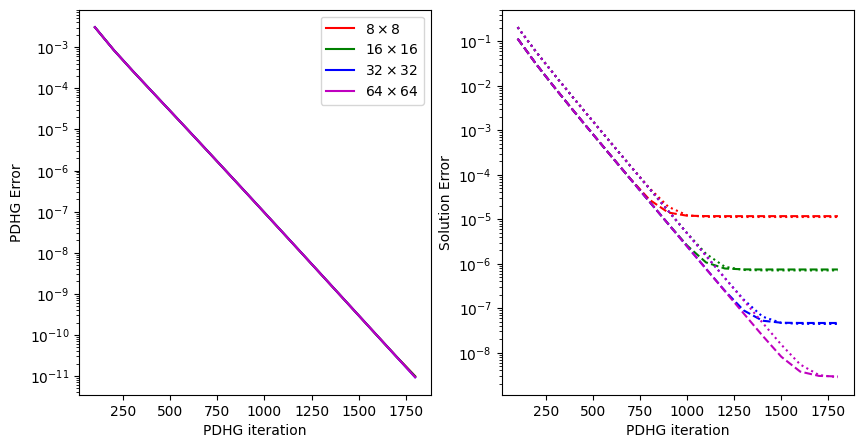

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1800
order = 3
for i in range(4):
    PP3 = PME1D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i,
            nonLinearSolver='newton'
        )
    if i == 0: print(PP3)
    PP3.solve()
    PP3.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP3.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP3.terminalErr[-1]))
        print("\n")
    err0 = PP3.stErr[-1]
    err1 = PP3.terminalErr[-1]
    
axs[0].legend()
plt.show()


# Two dimensions

## Sample solution

In [2]:
P = PME2D(beta = 0.005, nx = 8, ny = 8, nz = 8, order=1, nonLinearSolver="newton")
P.solve()


Iteration: 1000 PDHG error: 1.23581789e-05 spacetime error: 2.84286155e-03 terminal error 4.15198922e-03



## Convergence study

In [2]:
nx, ny, nz = 4, 4, 4
beta = 0.005

colors = ['darkorange','r','g']
labels = [r'$4\times 4 \times 4$',r'$8\times 8 \times 8$', r'$16\times 16 \times 16$']

### $\alpha = 1.5$

In [4]:
alpha = 1.5

$p=1$

Iteration: 1500 PDHG error: 8.23836117e-08 spacetime error: 8.64462632e-03 terminal error 1.26676893e-02

Iteration: 1500 PDHG error: 1.39162142e-07 spacetime error: 1.79300944e-03 terminal error 2.70611518e-03

Order (ST) =  2.269420519868488
Order (Terminal) =  2.226858238716651


Iteration: 1500 PDHG error: 1.59934366e-07 spacetime error: 4.32936867e-04 terminal error 6.57118771e-04

Order (ST) =  2.0501545194737583
Order (Terminal) =  2.0419971864622264




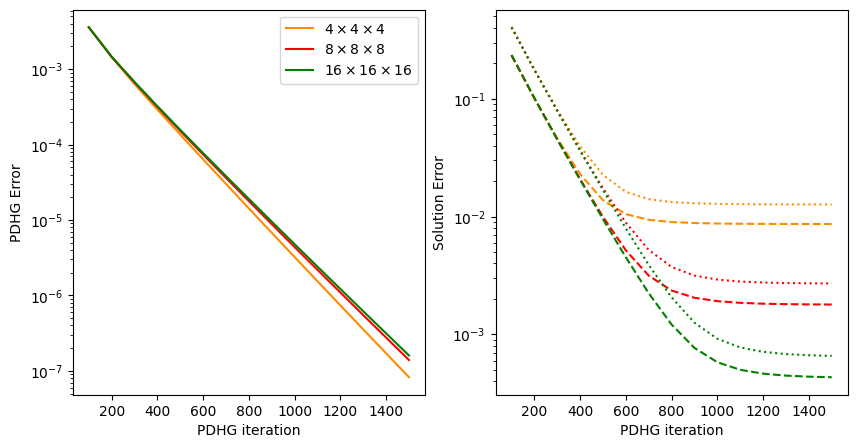

In [5]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1500
order = 1
for i in range(3):
    P21 = PME2D(
        order = order, 
        maxIter = nIter + 1, 
        alpha = alpha, 
        beta = beta, 
        nx = nx * 2 ** i, 
        ny = ny * 2 ** i, 
        nz = nz * 2 ** i,
        nonLinearSolver='newton'
        )
    P21.solve()
    P21.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P21.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P21.terminalErr[-1]))
        print("\n")
    err0 = P21.stErr[-1]
    err1 = P21.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=2$

Iteration: 2000 PDHG error: 5.29932564e-09 spacetime error: 1.44226430e-03 terminal error 1.52804543e-03

Iteration: 2000 PDHG error: 5.98095484e-09 spacetime error: 2.44485888e-04 terminal error 2.33827954e-04

Order (ST) =  2.560512470894122
Order (Terminal) =  2.708168121039812


Iteration: 2000 PDHG error: 6.94995761e-09 spacetime error: 3.22057273e-05 terminal error 2.79983117e-05

Order (ST) =  2.9243620145515474
Order (Terminal) =  3.062035674728653




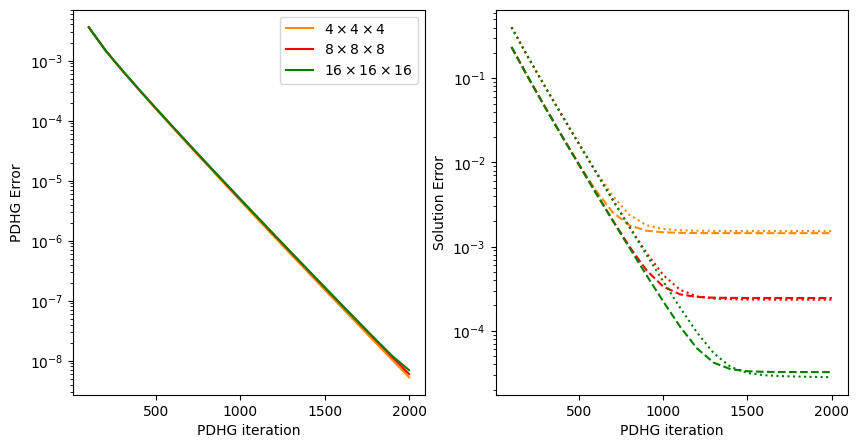

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 2000
order = 2
for i in range(3):
    P22 = PME2D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i, 
            nz = nz * 2 ** i,
            nonLinearSolver='newton'
        )
    P22.solve()
    P22.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P22.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P22.terminalErr[-1]))
        print("\n")
    err0 = P22.stErr[-1]
    err1 = P22.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Iteration: 2500 PDHG error: 2.19463892e-10 spacetime error: 1.69621747e-04 terminal error 1.68030310e-04

Iteration: 2500 PDHG error: 2.24304242e-10 spacetime error: 1.14981171e-05 terminal error 1.11483347e-05

Order (ST) =  3.8828516159861315
Order (Terminal) =  3.913821373498133


Iteration: 2500 PDHG error: 2.00349182e-10 spacetime error: 7.38664463e-07 terminal error 7.06384728e-07

Order (ST) =  3.960334647346788
Order (Terminal) =  3.980230257934363




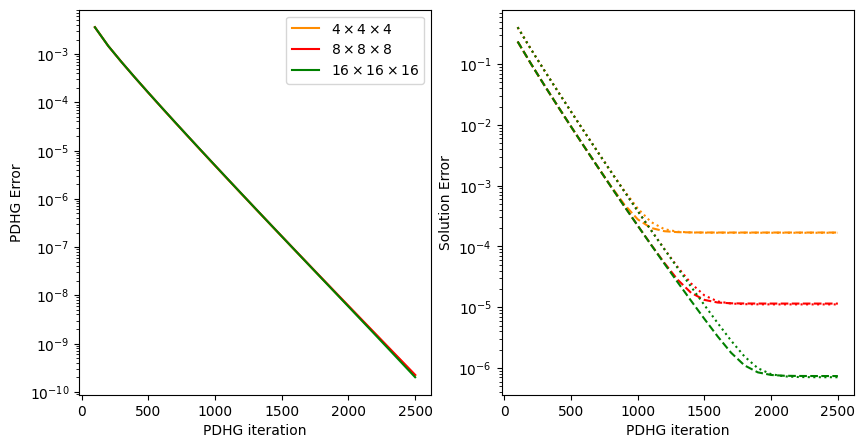

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 2500
order = 3
for i in range(3):
    P23 = PME2D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i, 
            nz = nz * 2 ** i,
            nonLinearSolver='newton'
        )
    P23.solve()
    P23.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/P23.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/P23.terminalErr[-1]))
        print("\n")
    err0 = P23.stErr[-1]
    err1 = P23.terminalErr[-1]
    
axs[0].legend()
plt.show()


### $\alpha = 2$

In [3]:
alpha = 2

$p=1$

Iteration: 1800 PDHG error: 7.22473080e-08 spacetime error: 1.17045582e-02 terminal error 1.55142118e-02

Iteration: 1800 PDHG error: 1.15498204e-07 spacetime error: 2.54675914e-03 terminal error 3.51566415e-03

Order (ST) =  2.200336049406065
Order (Terminal) =  2.141721243259903


Iteration: 1800 PDHG error: 1.31698480e-07 spacetime error: 6.16729207e-04 terminal error 8.58335999e-04

Order (ST) =  2.0459534480217205
Order (Terminal) =  2.034182844306537




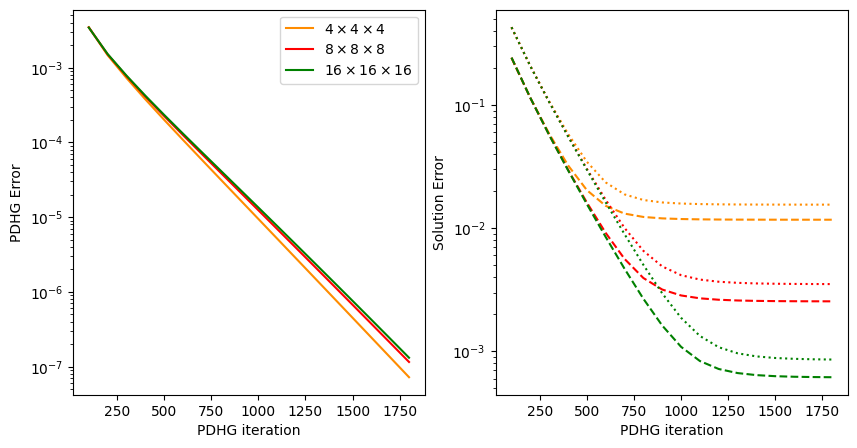

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 1800
order = 1
for i in range(3):
    PP21 = PME2D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i, 
            nz = nz * 2 ** i,
            nonLinearSolver='newton'
        )
    PP21.solve()
    PP21.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP21.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP21.terminalErr[-1]))
        print("\n")
    err0 = PP21.stErr[-1]
    err1 = PP21.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=2$

Iteration: 2500 PDHG error: 2.15239726e-09 spacetime error: 1.52349739e-03 terminal error 1.56072996e-03

Iteration: 2500 PDHG error: 2.73155676e-09 spacetime error: 2.45865770e-04 terminal error 2.29077700e-04

Order (ST) =  2.6314442286350266
Order (Terminal) =  2.768312018398609


Iteration: 2500 PDHG error: 4.95050800e-09 spacetime error: 3.22166292e-05 terminal error 2.66689964e-05

Order (ST) =  2.9319934361999493
Order (Terminal) =  3.1026015803833373




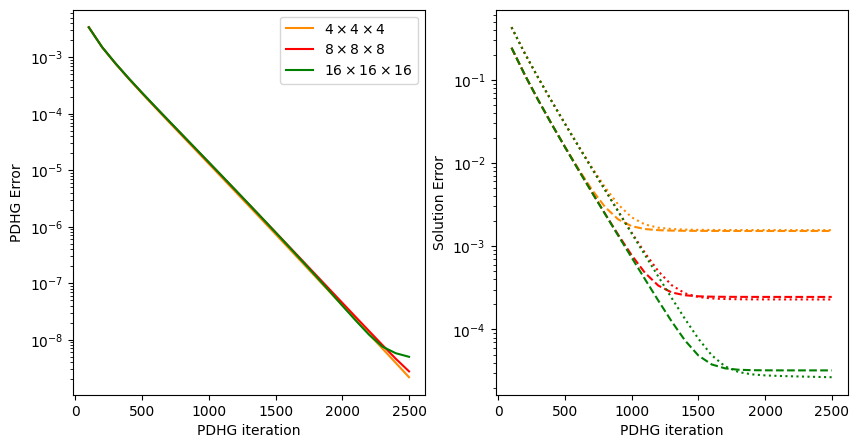

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 2500
order = 2
for i in range(3):
    PP22 = PME2D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i, 
            nz = nz * 2 ** i,
            nonLinearSolver='newton'
        )
    PP22.solve()
    PP22.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP22.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP22.terminalErr[-1]))
        print("\n")
    err0 = PP22.stErr[-1]
    err1 = PP22.terminalErr[-1]
    
axs[0].legend()
plt.show()


$p=3$

Iteration: 3200 PDHG error: 3.76108034e-11 spacetime error: 1.73646563e-04 terminal error 1.70156848e-04

Iteration: 3200 PDHG error: 4.22838431e-11 spacetime error: 1.15969918e-05 terminal error 1.11457046e-05

Order (ST) =  3.904331321513174
Order (Terminal) =  3.932305481214574


Iteration: 3200 PDHG error: 1.36541911e-09 spacetime error: 7.81406326e-07 terminal error 7.30581132e-07

Order (ST) =  3.8915338816086567
Order (Terminal) =  3.9312995224167455




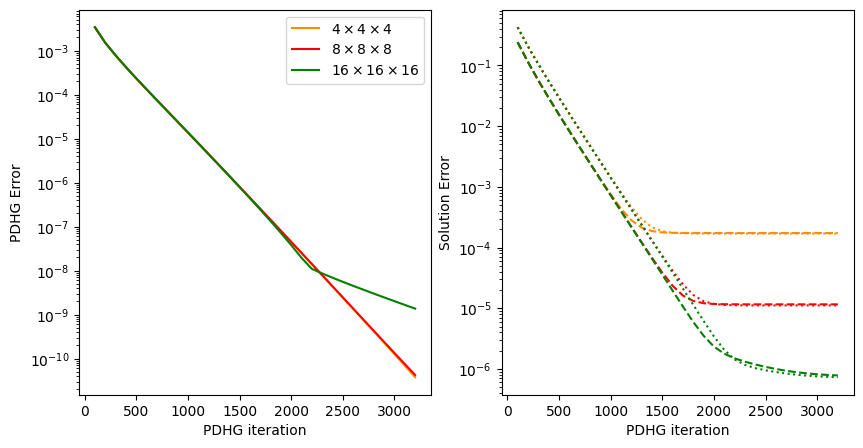

In [4]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

nIter = 3200
order = 3
for i in range(3):
    PP23 = PME2D(
            order = order, 
            maxIter = nIter + 1, 
            alpha = alpha, 
            beta = beta, 
            nx = nx * 2 ** i, 
            ny = ny * 2 ** i, 
            nz = nz * 2 ** i,
            nonLinearSolver='newton'
        )
    PP23.solve()
    PP23.plotErr(axs, labels[i], colors[i])
    if i > 0:
        print('Order (ST) = ', np.log2(err0/PP23.stErr[-1]))
        print('Order (Terminal) = ', np.log2(err1/PP23.terminalErr[-1]))
        print("\n")
    err0 = PP23.stErr[-1]
    err1 = PP23.terminalErr[-1]
    
axs[0].legend()
plt.show()
